## Downloading the Land cover for Uttarakhand from 2012 to 2023
******************************************************************
### Date: 6th Dec 2024
### Authored by: Priyanka N
******************************************************************
The land cover dataset MCD12Q1.061 MODIS Land Cover Type Yearly Global 500m includes the data for land cover from 2000 to 2023.
Spatial resolution is 500m and Temporal resolution is 1 year.
So, we will have 1 image/year.

We download the land cover images for LC_Type1 for Uttarakhand from 2012 to 2023 in both vector and raster format.

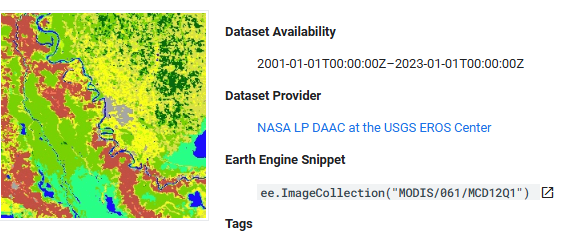

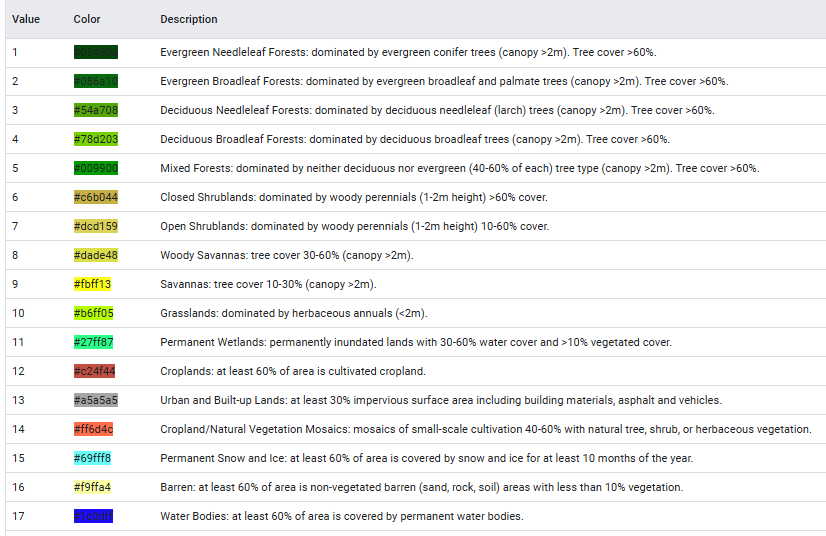

### Installing the required libraries

In [ ]:
!pip install earthengine-api geemap --q


In [ ]:
!pip install pycrs

  Preparing metadata (setup.py) ... done
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32687 sha256=4b8160a76b3f53d11b47fdda5acf22c180b74c6bd79b9dc7e525d93134cf2e14
  Stored in directory: /root/.cache/pip/wheels/47/1d/70/7a5bdf33347e7c75e95b06b1fa38f076a59a9506653cc24aff
Successfully built pycrs


### Importing the required libraries.

In [ ]:
import ee
import geemap

### Authentication and Initialization of GEE.

In [ ]:
ee.Authenticate()

In [ ]:
ee.Initialize(project="ee-nprinka235")

### Loading the shapefile for Uttarakhand which will be our region of interest.

In [ ]:
# Load a shapefile using geemap
shapefile = '/content/drive/MyDrive/Colab Notebooks/Forest_fire_prediction/Uttarakhand/uttarakhand_WGS1984.shp'
roi = geemap.shp_to_ee(shapefile)

### Defining the start and end dates for downloading the data.


In [ ]:
start_date = '2012-01-01'
end_date = '2023-12-31'

### Loading the land cover dataset on GEE.

In [ ]:
land_cover_collection = ee.ImageCollection('MODIS/061/MCD12Q1')\
                        .filterDate(start_date, end_date)\
                        .filterBounds(roi)

In [ ]:
land_cover_collection

### selecting only the LC_Type1 Band.

In [ ]:
land_cover_image = land_cover_collection.select('LC_Type1')
vis_params = { 'min': 1, 'max': 17, 'palette': ['05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159', 'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c', '69fff8', 'f9ffa4', '1c0dff'] }

In [ ]:
land_cover_image

In [ ]:
# Define legend keys and colors based on the provided classes
legend_keys = [
    'Evergreen Needleleaf Forests',
    'Evergreen Broadleaf Forests',
    'Deciduous Needleleaf Forests',
    'Deciduous Broadleaf Forests',
    'Mixed Forests',
    'Closed Shrublands',
    'Open Shrublands',
    'Woody Savannas',
    'Savannas',
    'Grasslands',
    'Permanent Wetlands',
    'Croplands',
    'Urban and Built-up Lands',
    'Cropland/Natural Vegetation Mosaics',
    'Permanent Snow and Ice',
    'Barren',
    'Water Bodies'
]

legend_colors = [
    '#05450a',  # 1
    '#086a10',  # 2
    '#54a708',  # 3
    '#78d203',  # 4
    '#009900',  # 5
    '#c6b044',  # 6
    '#dcd159',  # 7
    '#dade48',  # 8
    '#fbff13',  # 9
    '#b6ff05',  # 10
    '#27ff87',  # 11
    '#c24f44',  # 12
    '#a5a5a5',  # 13
    '#ff6d4c',  # 14
    '#69fff8',  # 15
    '#f9ffa4',  # 16
    '#1c0dff'   # 17
]

Map = geemap.Map()
# Center the map on a specific location (optional)
Map.centerObject(roi, zoom=6)

Map.addLayer(land_cover_image.clip(roi), vis_params, 'Land Cover 2024')
Map.addLayer(roi, {}, 'Shapefile')
# Add a legend to the map
Map.add_legend(keys=legend_keys, colors=legend_colors, title="Land Cover Types", position="bottomleft")
# Display the map
Map

Map(center=[30.15504600530337, 79.21019661576261], controls=(WidgetControl(options=['position', 'transparent_b…

### Getting the images list and the number of images.

In [ ]:
# Loop through each image in the collection
images_list = land_cover_image.toList(land_cover_image.size())  # Get images as list
num_images = images_list.size().getInfo()  # Number of images

In [ ]:
images_list

In [ ]:
print("The number of images in the list:", num_images)

The number of images in the list: 12


### Exporting the images to drive in raster format from 2012 to 2023.


In [ ]:
for i in range(num_images):
  image = ee.Image(images_list.get(i)).clip(roi)
  year = image.date().format('YYYY').getInfo()  # Extract year from metadata
  image_id = f'MODIS_Image_{year}'
  # **Export Raster as TIFF**
  raster_task = ee.batch.Export.image.toDrive(
      image=image,
      description=f'{image_id}_TIFF',
      folder='Omdena/Modis_Land_cover_2012_2023',  # Organize by year
      fileNamePrefix=image_id,
      scale=500,  # MODIS scale
      region=roi.geometry(), # Export within region
      crs='EPSG:4326',
      maxPixels=1e13
  )
  raster_task.start()
  print(f'TIFF export task started for image: {image_id}')


TIFF export task started for image: MODIS_Image_2012
TIFF export task started for image: MODIS_Image_2013
TIFF export task started for image: MODIS_Image_2014
TIFF export task started for image: MODIS_Image_2015
TIFF export task started for image: MODIS_Image_2016
TIFF export task started for image: MODIS_Image_2017
TIFF export task started for image: MODIS_Image_2018
TIFF export task started for image: MODIS_Image_2019
TIFF export task started for image: MODIS_Image_2020
TIFF export task started for image: MODIS_Image_2021
TIFF export task started for image: MODIS_Image_2022
TIFF export task started for image: MODIS_Image_2023


In [ ]:
print(raster_task.status())

{'state': 'COMPLETED', 'description': 'MODIS_Image_2023_TIFF', 'priority': 100, 'creation_timestamp_ms': 1733475875378, 'update_timestamp_ms': 1733476275144, 'start_timestamp_ms': 1733476257039, 'task_type': 'EXPORT_IMAGE', 'destination_uris': ['https://drive.google.com/#folders/1malj9z7Q-SXVpKGRbl9WkIFF8eVtsoRg'], 'attempt': 1, 'batch_eecu_usage_seconds': 1.1839364767074585, 'id': 'KNDLHF43VBI42QYGZZEEE4XG', 'name': 'projects/ee-nprinka235/operations/KNDLHF43VBI42QYGZZEEE4XG'}


### Exporting the images in vector format from 2012 to 2023.

In [ ]:
for i in range(num_images):
  image = ee.Image(images_list.get(i)).clip(roi)
  year = image.date().format('YYYY').getInfo()  # Extract year from metadata
  image_id = f'{year}_Vector'
  # Convert Raster to Vector and Export
  vectors = image.reduceToVectors(
      geometryType='polygon',
      reducer=ee.Reducer.countEvery(),
      geometry=roi.geometry(),  # Specify the region for vectorization
      scale=500,
      crs='EPSG:4326',
      maxPixels=1e13
  )
  vector_task = ee.batch.Export.table.toDrive(
      collection=vectors,
      description=f'MODIS_Image_{image_id}',
      fileFormat='CSV'
  )
  vector_task.start()
  print(f'Vector export task started for image: {image_id}')
  print(vector_task.status())

Vector export task started for image: 2012_Vector
{'state': 'READY', 'description': 'MODIS_Image_2012_Vector', 'priority': 100, 'creation_timestamp_ms': 1733477278093, 'update_timestamp_ms': 1733477278093, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_FEATURES', 'id': 'CJWUR66HC63HCSQQPMYKKPZ5', 'name': 'projects/ee-nprinka235/operations/CJWUR66HC63HCSQQPMYKKPZ5'}
Vector export task started for image: 2013_Vector
{'state': 'READY', 'description': 'MODIS_Image_2013_Vector', 'priority': 100, 'creation_timestamp_ms': 1733477284761, 'update_timestamp_ms': 1733477284761, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_FEATURES', 'id': 'HEIHPLWFTQWHEIKFH23H5HA2', 'name': 'projects/ee-nprinka235/operations/HEIHPLWFTQWHEIKFH23H5HA2'}
Vector export task started for image: 2014_Vector
{'state': 'READY', 'description': 'MODIS_Image_2014_Vector', 'priority': 100, 'creation_timestamp_ms': 1733477290711, 'update_timestamp_ms': 1733477290711, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_FEATURES', 'id

In [ ]:
print(vector_task.status())

{'state': 'COMPLETED', 'description': 'MODIS_Image_2023_Vector', 'priority': 100, 'creation_timestamp_ms': 1733477345504, 'update_timestamp_ms': 1733477566946, 'start_timestamp_ms': 1733477560221, 'task_type': 'EXPORT_FEATURES', 'destination_uris': ['https://drive.google.com/'], 'attempt': 1, 'batch_eecu_usage_seconds': 0.4958256185054779, 'id': '3WAU2WGQCH5VNTGUSSYCYGBH', 'name': 'projects/ee-nprinka235/operations/3WAU2WGQCH5VNTGUSSYCYGBH'}
